# Assignment

# Question 1
1. change the `encoding_dim` through various values (`range(2,18,2)` and store or keep track of the best loss you can get. Plot the 8 pairs of dimensions vs loss on a scatter plot

## Import modules and data

In [4]:
# import packages
import tensorflow as tf
import keras
from keras.callbacks import TensorBoard, EarlyStopping
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
import pandas as pd
import matplotlib.pyplot as  plt
%matplotlib inline

# import data
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

# preprocess data
xtrain = xtrain.astype('float32') / 255.
xtest = xtest.astype('float32') / 255.
xtrain = xtrain.reshape((len(xtrain), np.prod(xtrain.shape[1:])))
xtest = xtest.reshape((len(xtest), np.prod(xtest.shape[1:])))

# check structure
xtrain.shape, xtest.shape

((60000, 784), (10000, 784))

## Testing/checking class code 

In [5]:
# this is the size of our encoded representations
encoding_dim = 16  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
x = input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
encoded = Dense(encoding_dim, activation='relu')(x)


# "decoded" is the lossy reconstruction of the input
x = Dense(128, activation='relu')(encoded)
x = Dense(256, activation='relu')(x)
decoded = Dense(784, activation='sigmoid')(x)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
dcd1 = autoencoder.layers[-1]
dcd2 = autoencoder.layers[-2]
dcd3 = autoencoder.layers[-3]

# create the decoder model
decoder = Model(encoded_input, dcd1(dcd2(dcd3(encoded_input))))

In [23]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [24]:
autoencoder.fit(xtrain, xtrain,
                epochs=5,
                batch_size=100,
                shuffle=True,
                validation_data=(xtest, xtest))
                #callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Epoch 1/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.2510 - val_loss: 0.1320
Epoch 2/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.1292 - val_loss: 0.1184
Epoch 3/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.1180 - val_loss: 0.1131
Epoch 4/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.1129 - val_loss: 0.1080
Epoch 5/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.1083 - val_loss: 0.1054


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


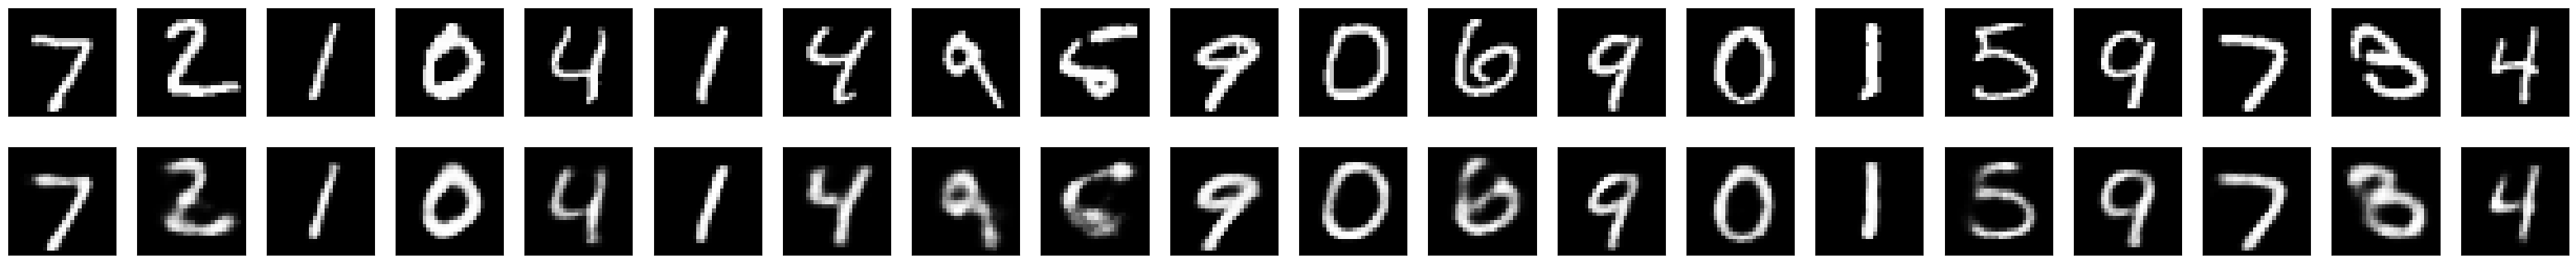

In [25]:
encoded_imgs = encoder.predict(xtest)
decoded_imgs = decoder.predict(encoded_imgs)

n = 20  # how many digits we will display
plt.figure(figsize=(40, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(xtest[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Solution to Question 1

Iteration 1/8 complete. Encoding Dim: 2, Best Val Loss: 0.17891442775726318
Iteration 2/8 complete. Encoding Dim: 4, Best Val Loss: 0.1474318653345108
Iteration 3/8 complete. Encoding Dim: 6, Best Val Loss: 0.14930331707000732
Iteration 4/8 complete. Encoding Dim: 8, Best Val Loss: 0.12830698490142822
Iteration 5/8 complete. Encoding Dim: 10, Best Val Loss: 0.11579173058271408
Iteration 6/8 complete. Encoding Dim: 12, Best Val Loss: 0.10405531525611877
Iteration 7/8 complete. Encoding Dim: 14, Best Val Loss: 0.11041177064180374
Iteration 8/8 complete. Encoding Dim: 16, Best Val Loss: 0.10610993206501007


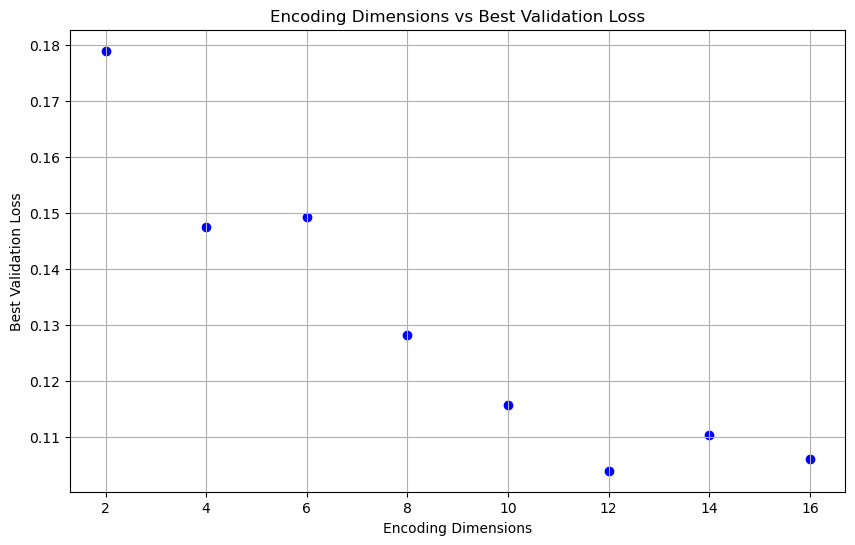

In [27]:
# Define the range of encoding dimensions to test
encoding_dims = range(2, 18, 2)

# Initialize list to keep track of losses
losses = []


# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# Loop over encoding dimensions
for i, encoding_dim in enumerate(encoding_dims, start=1):
    # input placeholder
    input_img = Input(shape=(784,))
    
    # "encoded" 
    x = Dense(256, activation='relu')(input_img)
    x = Dense(128, activation='relu')(x)
    encoded = Dense(encoding_dim, activation='relu')(x)
    
    # "decoded" 
    x = Dense(128, activation='relu')(encoded)
    x = Dense(256, activation='relu')(x)
    decoded = Dense(784, activation='sigmoid')(x)
    
    # maps model's reconstruction
    autoencoder = Model(input_img, decoded)
    
    # compile the model
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    
    # Train
    history = autoencoder.fit(xtrain, xtrain,
                              epochs=10,  
                              batch_size=100,
                              shuffle=True,
                              validation_data=(xtest, xtest),
                              verbose=0,
                              callbacks=[early_stopping])
    
    # save best validation loss
    best_val_loss = min(history.history['val_loss'])
    losses.append(best_val_loss)
    
    # loop counter
    print(f'Iteration {i}/{len(encoding_dims)} complete. Encoding Dim: {encoding_dim}, Best Val Loss: {best_val_loss}')

# Plot encoding dimensions vs loss
plt.figure(figsize=(10, 6))
plt.scatter(encoding_dims, losses, color='blue')
plt.title('Encoding Dimensions vs Best Validation Loss')
plt.xlabel('Encoding Dimensions')
plt.ylabel('Best Validation Loss')
plt.grid(True)
plt.show()

# Question 2
2. Using the previous assignment's model for detecting images, how does the accuracy change when you run the digit-prediction model on these 'decoded' values?

# Solution
Accuracy Score NON-decoded Image (from last week) = 83%

Accuracy Score on decoded Image = 95%


In [8]:
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend
from keras.utils import to_categorical

# Last week's parameters
batch_size = 128
num_classes = 10
epochs = 12

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Reshape data based on channels last / first
if backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, 28, 28)
    x_test = x_test.reshape(x_test.shape[0], 1, 28, 28)
    input_shape = (1, 28, 28)
else:
    x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
    x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)

# Define the autoencoder architecture
input_img = Input(shape=(784,))
x = Dense(256, activation='relu')(input_img)
x = Dense(128, activation='relu')(x)
encoded = Dense(16, activation='relu')(x)
x = Dense(128, activation='relu')(encoded)
x = Dense(256, activation='relu')(x)
decoded = Dense(784, activation='sigmoid')(x)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Reshape x_train and x_test for the autoencoder
x_train_flat = x_train.reshape((len(x_train), 784))
x_test_flat = x_test.reshape((len(x_test), 784))

# Train the autoencoder
autoencoder.fit(x_train_flat, x_train_flat,
                epochs=10,
                batch_size=100,
                shuffle=True,
                validation_data=(x_test_flat, x_test_flat))

# Decode the images using the autoencoder
decoded_imgs = autoencoder.predict(x_test_flat)
decoded_imgs = decoded_imgs.reshape((-1, 28, 28, 1))

# Define and compile the last week's model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Prepare labels
#y_train_cat = to_categorical(y_train, 10)
#y_test_cat = to_categorical(y_test, 10)

# convert class vectors to binary class matrices
y_train_cat = keras.utils.to_categorical(y_train, num_classes) # last weeks num_classes parameter = 10
y_test_cat = keras.utils.to_categorical(y_test, num_classes)

# Train Last week's model with original data 
model.fit(x_train, y_train_cat,
          batch_size=batch_size, # last weeks batch_size parameter = 128
          epochs=epochs, # last weeks epochs parameter = 12
          verbose=1,
          validation_data=(x_test, y_test_cat))

# Evaluate the last week's model on decoded images
score = model.evaluate(decoded_imgs, y_test_cat, verbose=1)

print('Test Loss on decoded images:', score[0])
print('Test Accuracy on decoded images:', score[1])


Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.2485 - val_loss: 0.1295
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.1270 - val_loss: 0.1174
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.1171 - val_loss: 0.1122
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.1124 - val_loss: 0.1091
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 0.1091 - val_loss: 0.1071
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.1073 - val_loss: 0.1055
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.1054 - val_loss: 0.1041
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.1041 - val_loss: 0.1034
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.1030 - val_loss: 0.1024
Epoch 10/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 0.1023 - val_loss: 0.1018
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Epoch 1/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 76s 159ms/step - accuracy: 0.8464 - loss: 0.4818 - v

# Question 3
3. **_After_** training an autoencoder with `encoding_dim=8`, apply noise (like the previous assignment) to *_only_* the input of the trained autoencoder (not the output). The output images should be without noise. 

Print a few noisy images along with the output images to show they don't have noise.

# Solution

In [24]:
# Load MNIST dataset
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

# Normalize data
xtrain = xtrain.astype('float32') / 255.
xtest = xtest.astype('float32') / 255.

# Add noise function
def add_noise(data, noise_scale=0.5):
    noisy_data = data + noise_scale * np.random.normal(loc=0.0, scale=1.0, size=data.shape)
    noisy_data = np.clip(noisy_data, 0., 1.)  # Clip to ensure values are between 0 and 1
    return noisy_data

# Apply noise and then flatten the data for the autoencoder
noisy_x_train = add_noise(xtrain)
noisy_x_test = add_noise(xtest)
noisy_x_train = noisy_x_train.reshape((-1, 784))
noisy_x_test = noisy_x_test.reshape((-1, 784))

# Also flatten the clean data to match the autoencoder output shape
xtrain_flat = xtrain.reshape((-1, 784))
xtest_flat = xtest.reshape((-1, 784))

# Define the autoencoder architecture
encoding_dim = 8  # Smaller dimension for encoding
input_img = Input(shape=(784,))
x = Dense(256, activation='relu')(input_img)
x = Dense(128, activation='relu')(x)
encoded = Dense(encoding_dim, activation='relu')(x)
x = Dense(128, activation='relu')(encoded)
x = Dense(256, activation='relu')(x)
decoded = Dense(784, activation='sigmoid')(x)

# Complete autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# Train the autoencoder
autoencoder.fit(
    noisy_x_train, xtrain_flat,
    epochs=10,
    batch_size=100,
    shuffle=True,
    validation_data=(noisy_x_test, xtest_flat),
    callbacks=[early_stopping]
)




Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.2718 - val_loss: 0.1657
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.1621 - val_loss: 0.1538
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.1520 - val_loss: 0.1471
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.1459 - val_loss: 0.1437
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.1422 - val_loss: 0.1412
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.1391 - val_loss: 0.1393
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.1367 - val_loss: 0.1388
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.1352 - val_loss: 0.1370
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.1335 - val_loss: 0.1364
Epoch 10/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 0.1318 - val_loss: 0.1356


### Plot Images: Original, Original w/Noise, Original w/Noised Decoded

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


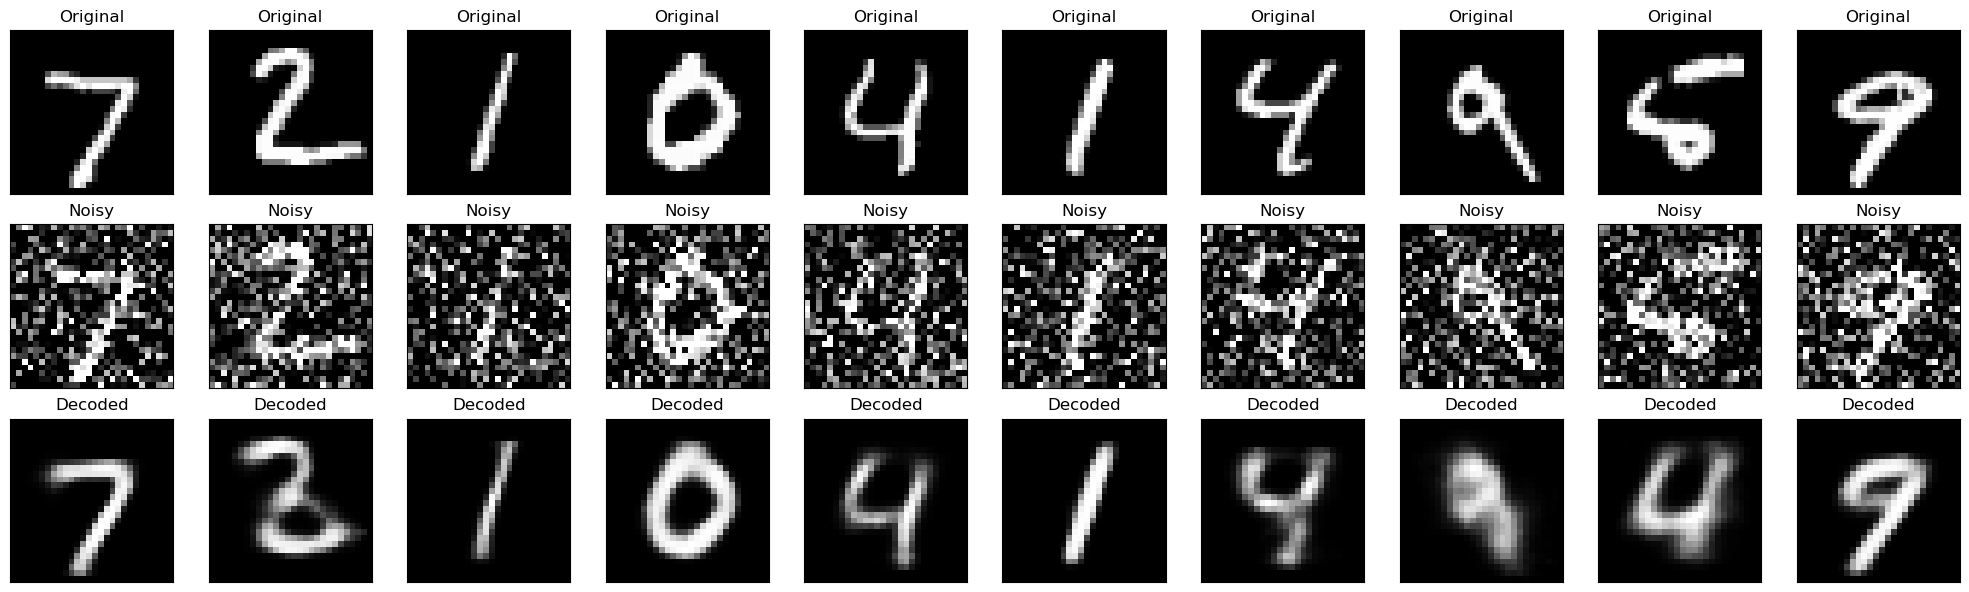

In [26]:

decoded_imgs = autoencoder.predict(noisy_x_test)
n = 10  # Number of digits to display

# Flatten noisy images for displaying
noisy_display = noisy_x_test.reshape((-1, 28, 28))

plt.figure(figsize=(20, 6))
for i in range(n):
    # Display original clean image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(xtest[i].reshape(28, 28))
    plt.title("Original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display noisy image
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(noisy_display[i].reshape(28, 28))
    plt.title("Noisy")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display decoded image
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.title("Decoded")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.tight_layout()
plt.show()
